Средний рост: 67.99311359679979
Медианный рост: 67.9957
Мода роста: 65.65796


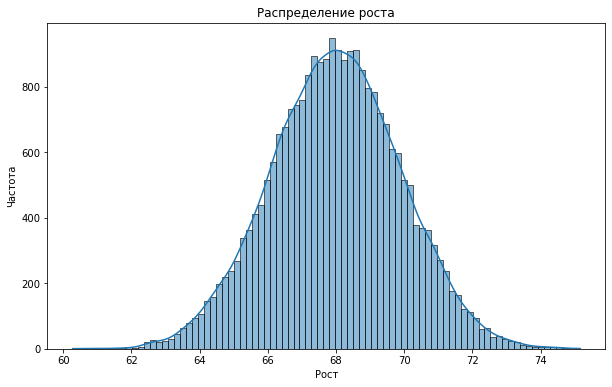

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('SOCR-HeightWeight.csv')

# Вычисление статистических показателей
mean_height = data['Height(Inches)'].mean()
median_height = data['Height(Inches)'].median()
mode_height = data['Height(Inches)'].mode()[0]

print(f"Средний рост: {mean_height}")
print(f"Медианный рост: {median_height}")
print(f"Мода роста: {mode_height}")

# Визуализация гистограммы
plt.figure(figsize=(10, 6))
sns.histplot(data['Height(Inches)'], kde=True)
plt.title('Распределение роста')
plt.xlabel('Рост')
plt.ylabel('Частота')
plt.show()


In [13]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Загрузка данных
data = pd.read_csv('powerball_usa.csv')

# Просмотр первых нескольких строк
print(data.head())


         DrawingNumbers  Powerball  Result   Jackpot    Weekday        Date
0   [1, 11, 18, 30, 41]         12       0   3400000  Wednesday  1992-12-30
1   [6, 12, 17, 18, 42]         17       0   2000000   Saturday  1992-12-26
2   [7, 12, 21, 25, 31]         11       1  10443874  Wednesday  1992-12-23
3  [11, 16, 32, 37, 39]         27       0   8400000   Saturday  1992-12-19
4    [4, 7, 11, 25, 40]         24       0   6400000  Wednesday  1992-12-16


In [14]:
# Функция для преобразования строки в список чисел
def parse_numbers(s):
    return ast.literal_eval(s)

# Применение функции к столбцу 'DrawingNumbers'
data['Numbers'] = data['DrawingNumbers'].apply(parse_numbers)

# Просмотр преобразованных данных
print(data[['DrawingNumbers', 'Numbers']].head())


         DrawingNumbers               Numbers
0   [1, 11, 18, 30, 41]   [1, 11, 18, 30, 41]
1   [6, 12, 17, 18, 42]   [6, 12, 17, 18, 42]
2   [7, 12, 21, 25, 31]   [7, 12, 21, 25, 31]
3  [11, 16, 32, 37, 39]  [11, 16, 32, 37, 39]
4    [4, 7, 11, 25, 40]    [4, 7, 11, 25, 40]


In [15]:
# Объединение всех номеров в один список
all_numbers = [number for numbers in data['Numbers'] for number in numbers]

# Преобразование в Series для удобства анализа
numbers_series = pd.Series(all_numbers)

print(numbers_series.head(10))


0     1
1    11
2    18
3    30
4    41
5     6
6    12
7    17
8    18
9    42
dtype: int64


In [16]:
mean_number = numbers_series.mean()
median_number = numbers_series.median()
mode_number = numbers_series.mode()[0]

print(f"Среднее значение: {mean_number:.2f}")
print(f"Медиана: {median_number}")
print(f"Мода: {mode_number}")


Среднее значение: 28.43
Медиана: 28.0
Мода: 32


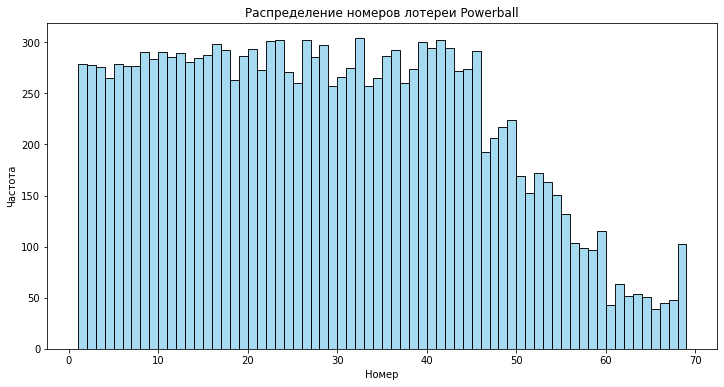

In [17]:
plt.figure(figsize=(12, 6))
sns.histplot(numbers_series, bins=range(1, 70), kde=False, color='skyblue')
plt.title('Распределение номеров лотереи Powerball')
plt.xlabel('Номер')
plt.ylabel('Частота')
plt.show()


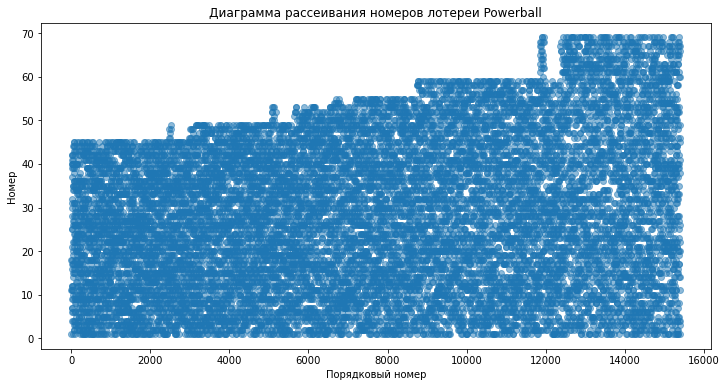

In [18]:
plt.figure(figsize=(12, 6))
plt.scatter(range(len(numbers_series)), numbers_series, alpha=0.5)
plt.title('Диаграмма рассеивания номеров лотереи Powerball')
plt.xlabel('Порядковый номер')
plt.ylabel('Номер')
plt.show()


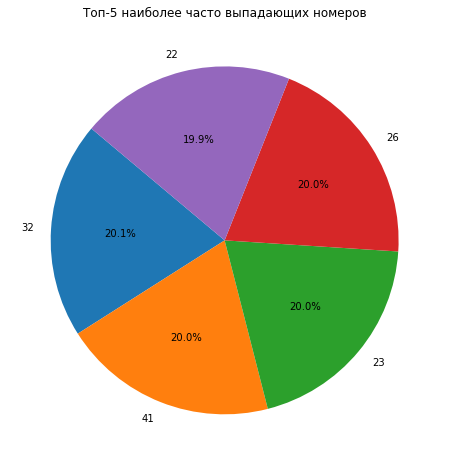

In [19]:
# Топ-5 наиболее часто встречающихся номеров
top_numbers = numbers_series.value_counts().head(5)

# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(top_numbers, labels=top_numbers.index, autopct='%1.1f%%', startangle=140)
plt.title('Топ-5 наиболее часто выпадающих номеров')
plt.show()


In [20]:
from scipy.stats import kstest

# Нормализация данных для теста (приведение к диапазону [0, 1])
normalized_numbers = (numbers_series - numbers_series.min()) / (numbers_series.max() - numbers_series.min())

# Выполнение теста Колмогорова-Смирнова
statistic, p_value = kstest(normalized_numbers, 'uniform')

print(f"Статистика теста: {statistic:.4f}")
print(f"p-значение: {p_value:.4f}")


Статистика теста: 0.1782
p-значение: 0.0000


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
data = pd.read_csv('housing-2.csv')

# Просмотр первых строк
print(data[['median_income']].head())

   median_income
0         8.3252
1         8.3014
2         7.2574
3         5.6431
4         3.8462


In [24]:
# Извлечение столбца 'median_income'
income = data['median_income']

# Вычисление размаха
range_income = income.max() - income.min()

# Вычисление среднего и медианы
mean_income = income.mean()
median_income = income.median()

# Вычисление смещения медианы относительно среднего в процентах размаха
shift = ((mean_income - median_income) / range_income) * 100

print(f"Средний доход (mean): {mean_income:.4f}")
print(f"Медианный доход (median): {median_income:.4f}")
print(f"Размах доходов (range): {range_income:.4f}")
print(f"Смещение медианы относительно среднего: {shift:.2f}%")


Средний доход (mean): 3.8707
Медианный доход (median): 3.5348
Размах доходов (range): 14.5002
Смещение медианы относительно среднего: 2.32%


Не подходит, так как маленькое смешение

In [25]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка датасета
data = sns.load_dataset('tips')

# Просмотр первых нескольких строк
print(data.head())

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [26]:
size = data['size']

# Вычисление размаха
range_size = size.max() - size.min()

# Вычисление среднего и медианы
mean_size = size.mean()
median_size = size.median()

# Вычисление смещения медианы относительно среднего
shift_size = ((mean_size - median_size) / range_size) * 100

print(f"Средний размер группы (mean): {mean_size:.2f}")
print(f"Медианный размер группы (median): {median_size:.2f}")
print(f"Размах размера группы (range): {range_size}")
print(f"Смещение медианы относительно среднего: {shift_size:.2f}%")

Средний размер группы (mean): 2.57
Медианный размер группы (median): 2.00
Размах размера группы (range): 5
Смещение медианы относительно среднего: 11.39%


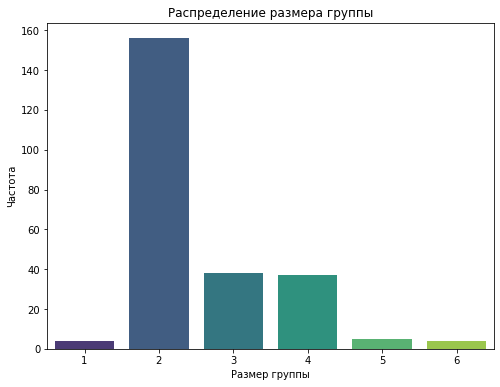

In [27]:
plt.figure(figsize=(8, 6))
sns.countplot(x=size, palette='viridis')
plt.title('Распределение размера группы')
plt.xlabel('Размер группы')
plt.ylabel('Частота')
plt.show()

In [28]:
# Импорт необходимых библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка датасета
diamonds = sns.load_dataset('diamonds')

# Просмотр первых нескольких строк
print(diamonds.head())


   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75


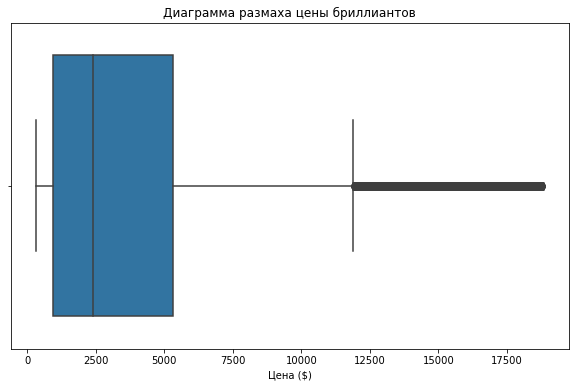

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=diamonds['price'])
plt.title('Диаграмма размаха цены бриллиантов')
plt.xlabel('Цена ($)')
plt.show()

In [30]:
# Расчет квартилей и IQR
Q1 = diamonds['price'].quantile(0.25)
Q3 = diamonds['price'].quantile(0.75)
IQR = Q3 - Q1

# Определение границ выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Выборка выбросов
outliers = diamonds[diamonds['price'] > upper_bound]

print(f"Количество выбросов: {len(outliers)}")


Количество выбросов: 3540


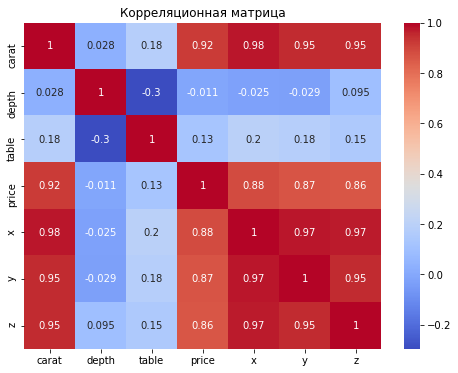

In [31]:
# Выбор числовых признаков
numeric_features = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']

# Расчет корреляционной матрицы
corr_matrix = diamonds[numeric_features].corr()

# Визуализация корреляционной матрицы
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица')
plt.show()


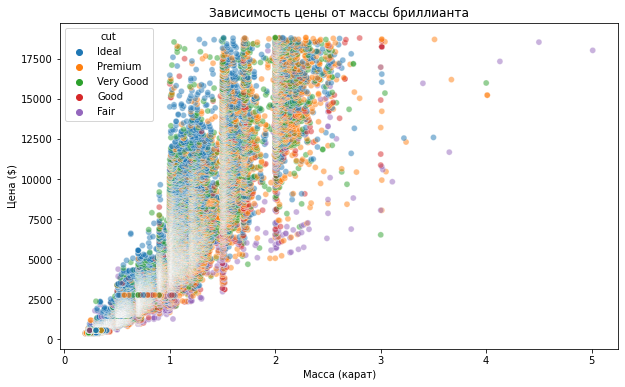

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='carat', y='price', data=diamonds, hue='cut', alpha=0.5)
plt.title('Зависимость цены от массы бриллианта')
plt.xlabel('Масса (карат)')
plt.ylabel('Цена ($)')
plt.show()


In [33]:
# Средние значения массы для выбросов и остальных данных
mean_carat_outliers = outliers['carat'].mean()
mean_carat_others = diamonds[diamonds['price'] <= upper_bound]['carat'].mean()

print(f"Средняя масса выбросов: {mean_carat_outliers:.2f} карат")
print(f"Средняя масса остальных бриллиантов: {mean_carat_others:.2f} карат")


Средняя масса выбросов: 1.86 карат
Средняя масса остальных бриллиантов: 0.72 карат


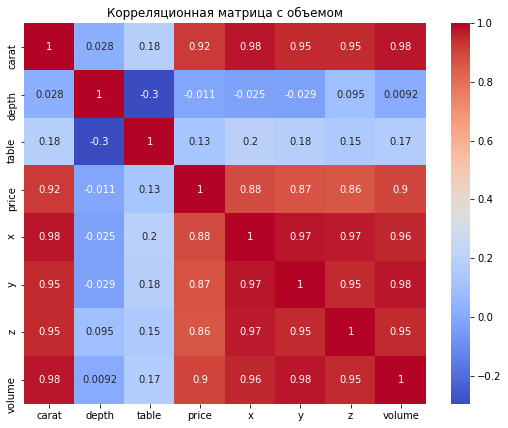

In [34]:
# Расчет объема
diamonds['volume'] = diamonds['x'] * diamonds['y'] * diamonds['z']

# Добавление объема в корреляционную матрицу
numeric_features.append('volume')
corr_matrix = diamonds[numeric_features].corr()

# Визуализация обновленной корреляционной матрицы
plt.figure(figsize=(9, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Корреляционная матрица с объемом')
plt.show()


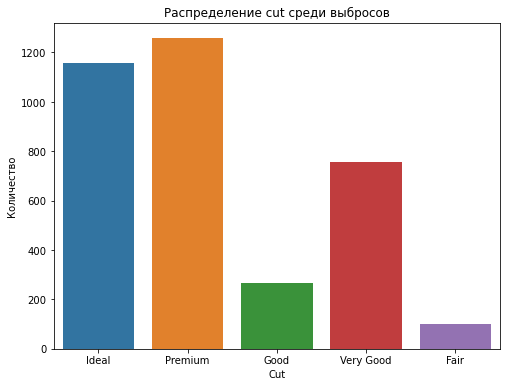

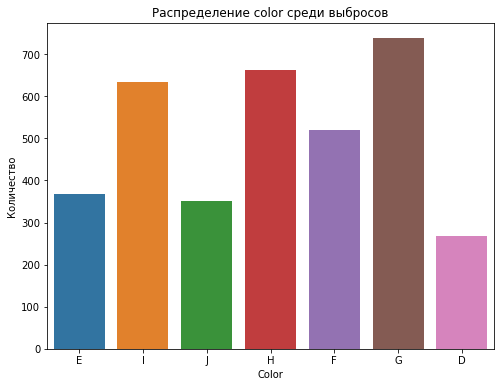

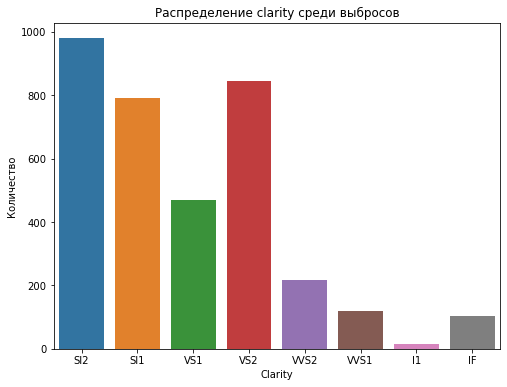

In [35]:
# Распределение качественных признаков в выбросах
qualitative_features = ['cut', 'color', 'clarity']

for feature in qualitative_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=outliers, order=diamonds[feature].unique())
    plt.title(f'Распределение {feature} среди выбросов')
    plt.xlabel(feature.capitalize())
    plt.ylabel('Количество')
    plt.show()
